<a href="https://colab.research.google.com/github/DGOUSIA/Breast-Cancer/blob/main/Breast_Cancer_Diagnosis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast-cancer-diagnosis**                   February 14,

Breast Cancer Diagnosis Using Python

In [12]:
 ## importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from google.colab import files
uploaded = files.upload()

Saving breast cancer.csv to breast cancer.csv


In [18]:
import pandas as pd

# Assuming 'breast cancer.csv' is the name of your uploaded file and is in the current working directory
df = pd.read_csv('breast cancer.csv')

# Now you can use df.head() to display the first few rows
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [21]:
# return the size of dataset
df.shape

(569, 33)

In [26]:
# remove the column
df=df.dropna(axis=1)

In [24]:
# shape of dataset after removing the null column
df.shape

(569, 32)

In [25]:
# describe the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


B    357
M    212
Name: diagnosis, dtype: int64


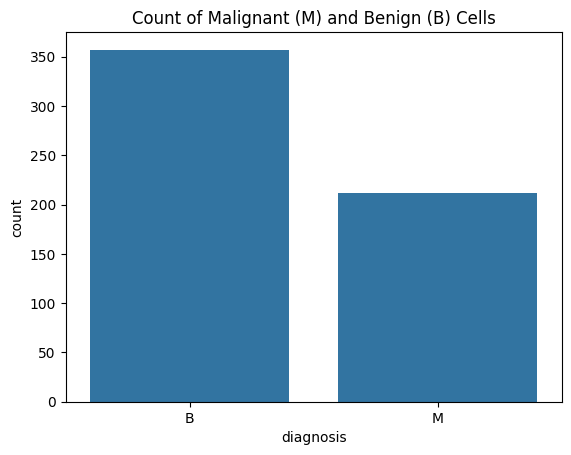

In [27]:
#Get the count of malignant (M) and benign (B) cells
diagnosis_counts = df['diagnosis'].value_counts()

# Display the counts
print(diagnosis_counts)

# Plot the count using seaborn
sns.countplot(x='diagnosis', data=df, order=diagnosis_counts.index)
plt.title('Count of Malignant (M) and Benign (B) Cells')
plt.show()

In [30]:
# label encoding on your 'diagnosis' column converts the categorical labels 'M'and 'B into numerical labels '1' and '0',
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder with a different variable name
labelencoder_diagnosis = LabelEncoder()

# Fit label encoder and return encoded labels for the 'diagnosis' column
df['diagnosis'] = labelencoder_diagnosis.fit_transform(df['diagnosis'])

In [32]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


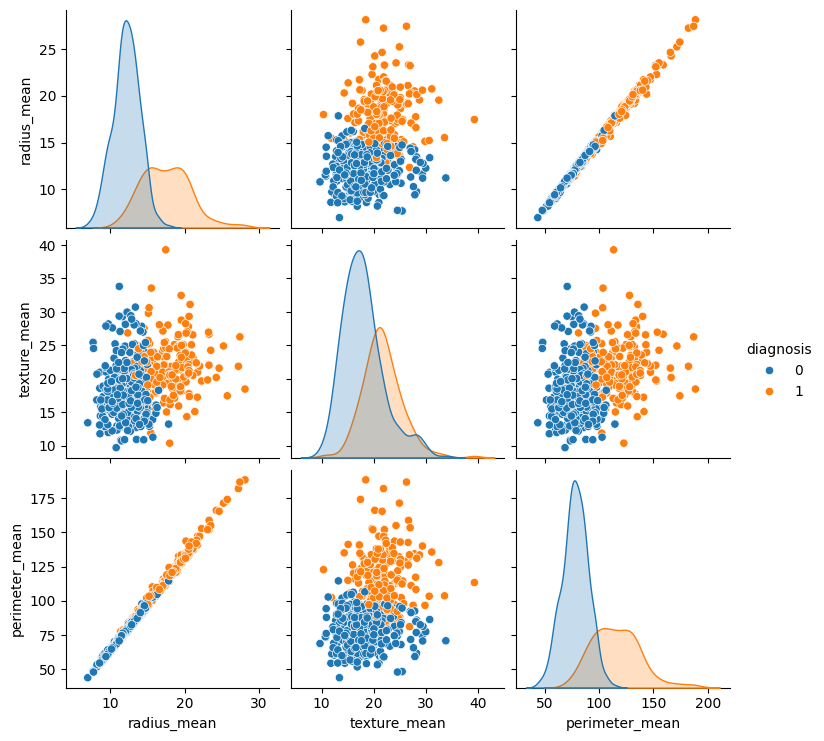

In [35]:
# Assuming 'df' is your DataFrame and 'diagnosis' is a column in 'df'
# Assuming 'df' is your DataFrame and contains the columns 'diagnosis', 'radius_mean', 'texture_mean', and 'perimeter_mean'
sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']], hue='diagnosis')

# Display the plot
plt.show()


In [37]:
# get the correlation
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


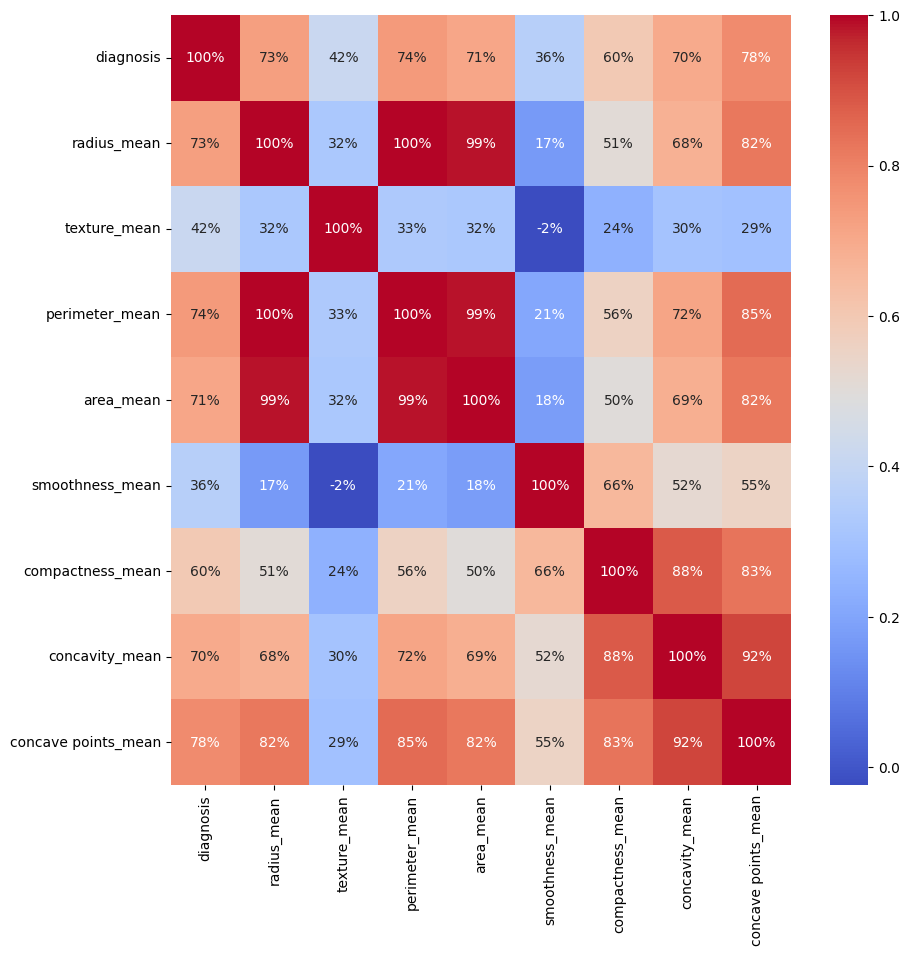

In [47]:
# Calculate the correlation matrix for the first ten features, including 'diagnosis'.
corr_matrix = df.iloc[:,1:10].corr()

# Set up the matplotlib figure with a specified figure size.
plt.figure(figsize=(10, 10))

# Draw the heatmap with the correlation matrix, annotations, and no decimals in the annotations.
sns.heatmap(corr_matrix, annot=True, fmt=".0%", cmap='coolwarm')

# Display the heatmap.
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your previously defined DataFrame with all the data

# Split the dataset into features (X) and target (Y)
X = df.iloc[:, 2:31].values  # Features (independent variables)
Y = df.iloc[:, 1].values    # Target (dependent variable, 'diagnosis')

# Splitting the data into training and test dataset with 30% of the data as the test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train, X_test, Y_train, and Y_test are now ready for training and testing a machine learning model.

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def models(X_train, Y_train):
    # Decision Tree Classifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)

    # Random Forest Classifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    # Training accuracy
    print('[0] Decision Tree Training Accuracy:', tree.score(X_train, Y_train))
    print('[1] Random Forest Training Accuracy:', forest.score(X_train, Y_train))

    return tree, forest

# You should define X_train and Y_train before calling this function
# model_tree, model_forest = models(X_train, Y_train)

In [52]:
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_validation(models, X, Y, k=5):
    for i, model in enumerate(models):
        scores = cross_val_score(model, X, Y, cv=k, scoring='accuracy')
        print(f'Model {i} Cross-Validation Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores)*2:.4f})')


In [53]:
# testing the models/result
models_list = models(X_train, Y_train)
cross_validation(models_list, X_train, Y_train)

[0] Decision Tree Training Accuracy: 1.0
[1] Random Forest Training Accuracy: 0.9949748743718593
Model 0 Cross-Validation Accuracy: 0.9120 (+/- 0.0579)
Model 1 Cross-Validation Accuracy: 0.9372 (+/- 0.0416)


In [54]:
# Define the models
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

# Place the models in a list to iterate over in the cross-validation function
models_list = [decision_tree, random_forest]

# Function to perform k-fold cross-validation on the test dataset
def cross_validation_test(models, X_test, Y_test, k=5):
    for i, model in enumerate(models):
        # Perform cross-validation on the test set
        scores = cross_val_score(model, X_test, Y_test, cv=k, scoring='accuracy')
        print(f'Model {i} Cross-Validation Accuracy on Test Dataset: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')

# Assuming X_train, Y_train, X_test, and Y_test have been defined and contain the appropriate data
# Train the models on the training set before performing cross-validation on the test set
for model in models_list:
    model.fit(X_train, Y_train)

# Perform cross-validation on the test set
cross_validation_test(models_list, X_test, Y_test)

Model 0 Cross-Validation Accuracy on Test Dataset: 0.9010 (+/- 0.0462)
Model 1 Cross-Validation Accuracy on Test Dataset: 0.9358 (+/- 0.0215)


In [56]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_grid, X_train, Y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    return best_model, best_params

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_grid, X_train, Y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    return best_model, best_params

# Define parameter grids for decision tree and random forest
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_forest = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for decision tree
best_tree_model, best_tree_params = grid_search(DecisionTreeClassifier(), param_grid_tree, X_train, Y_train)

# Perform grid search for random forest
best_forest_model, best_forest_params = grid_search(RandomForestClassifier(), param_grid_forest, X_train, Y_train)

# Display the best parameters for each model
print("Best Decision Tree Model:")
print(best_tree_params)
print("Best Random Forest Model:")
print(best_forest_params)


Best Decision Tree Model:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Random Forest Model:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}


In [59]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def report_final_performance(models, X_test, Y_test, model_names):
    for model, name in zip(models, model_names):
        print(f"\n{name} Test Performance:")
        y_pred = model.predict(X_test)
        print(classification_report(Y_test, y_pred))
        print('Accuracy:', accuracy_score(Y_test, y_pred))

        # Compute specificity and sensitivity
        tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)
        print('Specificity:', specificity)
        print('Sensitivity:', sensitivity)

# Usage
model_names = ['DecisionTree', 'RandomForest']
report_final_performance(models_list, X_test, Y_test, model_names)


DecisionTree Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9473684210526315
Specificity: 0.9537037037037037
Sensitivity: 0.9365079365079365

RandomForest Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Specificity: 0.9907407407407407
Sensitivity: 0.9365079365079365



DecisionTree Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9473684210526315


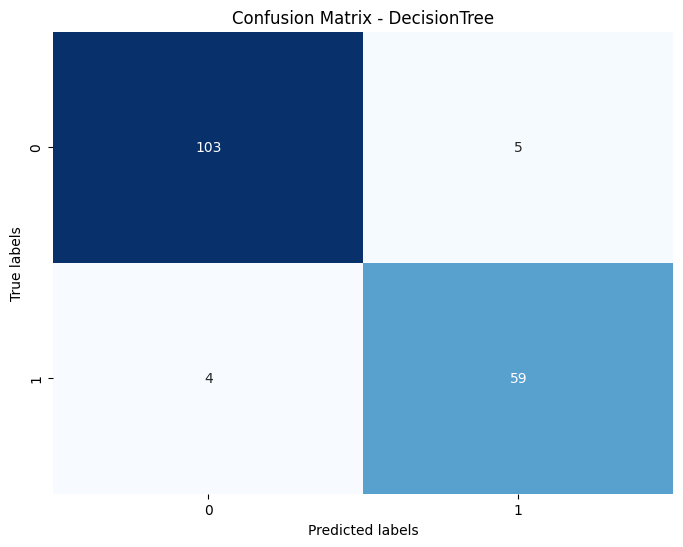


RandomForest Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286


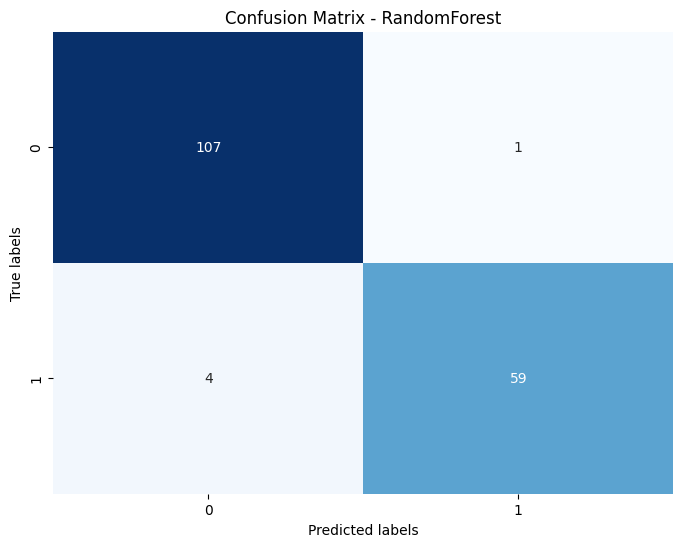

In [60]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def report_final_performance(models, X_test, Y_test, model_names):
    for model, name in zip(models, model_names):
        print(f"\n{name} Test Performance:")
        y_pred = model.predict(X_test)
        print(classification_report(Y_test, y_pred))
        print('Accuracy:', accuracy_score(Y_test, y_pred))

        # Compute confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

# Usage
model_names = ['DecisionTree', 'RandomForest']
report_final_performance(models_list, X_test, Y_test, model_names)
